# ANÁLISIS DE CORRESPONDENCIAS MÚLTIPLE

## Realizado por: Pablo Sánchez Cabrera

Se cargan las librerías y los datos

In [4]:
import os
import pandas as pd
import numpy as np
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

In [5]:
poison = pd.read_csv('../data/poison.csv', header='infer', index_col=0)

poison = poison.drop(['Age', 'Time', 'Sick', 'Sex'], axis=1)
poison.head(15)

,Nausea,Vomiting,Abdominals,Fever,Diarrhae,Potato,Fish,Mayo,Courgette,Cheese,Icecream
1,Nausea_y,Vomit_n,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
2,Nausea_n,Vomit_n,Abdo_n,Fever_n,Diarrhea_n,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_n,Icecream_y
3,Nausea_n,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
4,Nausea_n,Vomit_n,Abdo_n,Fever_n,Diarrhea_n,Potato_y,Fish_y,Mayo_n,Courg_y,Cheese_y,Icecream_y
5,Nausea_n,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
6,Nausea_n,Vomit_n,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_n,Mayo_y,Courg_y,Cheese_y,Icecream_y
7,Nausea_n,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
8,Nausea_y,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
9,Nausea_y,Vomit_n,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
10,Nausea_n,Vomit_y,Abdo_n,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y


Se realiza el modelo teniendo en cuenta 5 dimensiones a falta de confirmar por `Scree plot` y `varianza explicada`.

In [8]:
dimensiones=['Dim_1', 'Dim_2', 'Dim_3', 'Dim_4', 'Dim_5']

acm = MCA(n_components=len(dimensiones), row_labels=poison.index, var_labels=poison.columns)  #definición del modelo
acm.fit(poison.to_numpy())

MCA(n_components=5,
    row_labels=Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55],
      dtype='int64'),
    var_labels=Index(['Nausea', 'Vomiting', 'Abdominals', 'Fever', 'Diarrhae', 'Potato',
       'Fish', 'Mayo', 'Courgette', 'Cheese', 'Icecream'],
      dtype='object'))

Destacar que para poder utilizar esta librería es necesario trabajar los datos en formato matriz. Por ello, se aplica la conversión del dataframe a matriz con el método `to_numpy`

`Autovalores y Varianza Explicada`

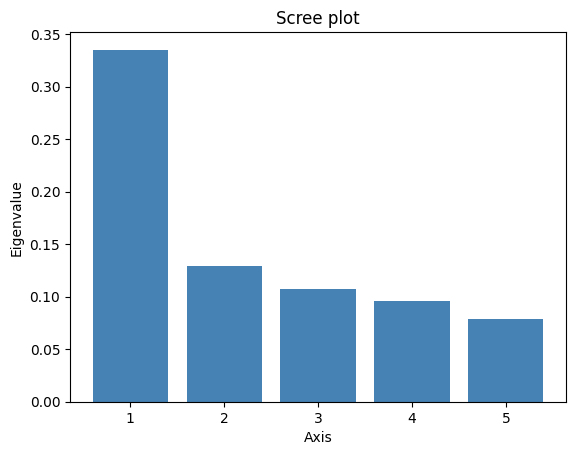

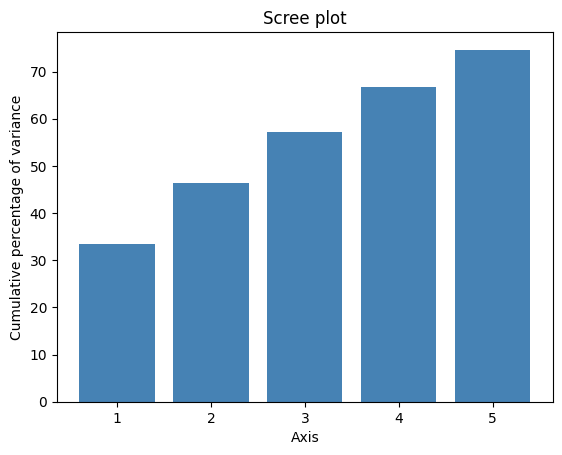

In [9]:
acm.plot_eigenvalues()  #gráfico autovalores
acm.plot_eigenvalues('cumulative')  #gráfico varianza explicada

A la vista del gráfico, se observa qeu con tres dimensiones se recoge aproximadamente el 60% de la variabilidad de los datos

`Perfiles Fila`

- `Coordenadas`

In [10]:
pd.DataFrame(acm.row_coord_, columns=dimensiones, index=poison.index).head()

,Dim_1,Dim_2,Dim_3,Dim_4,Dim_5
1,-0.452581,0.264151,0.171516,-0.013693,0.116968
2,0.836170,0.031935,-0.072082,0.085504,-0.519787
3,-0.448189,-0.135387,-0.224840,0.141702,0.050048
4,0.880369,0.085362,-0.020520,0.072759,0.229350
5,-0.448189,-0.135387,-0.224840,0.141702,0.050048


- `Contribuciones relativas - cos2`

In [11]:
pd.DataFrame(acm.row_cos2_, columns=dimensiones, index=poison.index).head()

,Dim_1,Dim_2,Dim_3,Dim_4,Dim_5
1,0.346526,0.118045,0.049768,0.000317,0.023146
2,0.555896,0.000811,0.004131,0.005813,0.214810
3,0.548139,0.050018,0.137948,0.054792,0.006835
4,0.747740,0.007030,0.000406,0.005107,0.050748
5,0.548139,0.050018,0.137948,0.054792,0.006835


- `Contribuciones a las dimensiones`

In [13]:
pd.DataFrame(acm.row_contrib_, columns=dimensiones, index=poison.index).head()

,Dim_1,Dim_2,Dim_3,Dim_4,Dim_5
1,1.110927,0.982383,0.498255,0.003556,0.315548
2,3.792117,0.014358,0.088004,0.138637,6.231341
3,1.089470,0.258067,0.856230,0.380769,0.057769
4,4.203611,0.102591,0.007132,0.100388,1.213190
5,1.089470,0.258067,0.856230,0.380769,0.057769


`Perfiles Columna`

- Coordenadas, cosenos y contribuciones

In [14]:
acm.col_topandas() # data.frame con toda la información relativa a los perfiles columna

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4,col_coord_dim5,col_contrib_dim1,col_contrib_dim2,col_contrib_dim3,col_contrib_dim4,col_contrib_dim5,col_cos2_dim1,col_cos2_dim2,col_cos2_dim3,col_cos2_dim4,col_cos2_dim5
Nausea_Nausea_n,0.267391,-0.121390,-0.265583,-0.033761,-0.073705,1.515869,0.811000,4.670018,0.084494,0.489779,0.256201,0.052803,0.252748,0.004084,0.019466
Nausea_Nausea_y,-0.958151,0.434982,0.951673,0.120978,0.264110,5.431862,2.906084,16.734230,0.302770,1.755042,0.256201,0.052803,0.252748,0.004084,0.019466
Vomiting_Vomit_n,0.479028,0.409195,0.084493,-0.273611,-0.052453,3.733667,7.072263,0.362746,4.258937,0.190364,0.344202,0.251160,0.010709,0.112295,0.004127
Vomiting_Vomit_y,-0.718542,-0.613792,-0.126739,0.410417,0.078679,5.600500,10.608394,0.544118,6.388406,0.285546,0.344202,0.251160,0.010709,0.112295,0.004127
Abdominals_Abdo_n,1.318022,0.035745,-0.005094,0.153610,0.069870,15.417637,0.029437,0.000719,0.732196,0.184243,0.845116,0.000622,0.000013,0.011479,0.002375
Abdominals_Abdo_y,-0.641200,-0.017389,0.002478,-0.074729,-0.033991,7.500472,0.014321,0.000350,0.356204,0.089632,0.845116,0.000622,0.000013,0.011479,0.002375
Fever_Fever_n,1.171831,0.174895,0.097275,0.189671,0.018479,13.541285,0.783015,0.291396,1.240368,0.014319,0.784679,0.017479,0.005407,0.020557,0.000195
Fever_Fever_y,-0.669618,-0.099940,-0.055586,-0.108383,-0.010559,7.737877,0.447437,0.166512,0.708782,0.008182,0.784679,0.017479,0.005407,0.020557,0.000195
Diarrhae_Diarrhea_n,1.182822,0.002757,-0.082980,0.241230,0.104911,13.796504,0.000195,0.212043,2.006373,0.461539,0.799468,0.000004,0.003935,0.033253,0.006289
Diarrhae_Diarrhea_y,-0.675899,-0.001575,0.047417,-0.137846,-0.059949,7.883717,0.000111,0.121167,1.146499,0.263737,0.799468,0.000004,0.003935,0.033253,0.006289


`Calidad de representación`

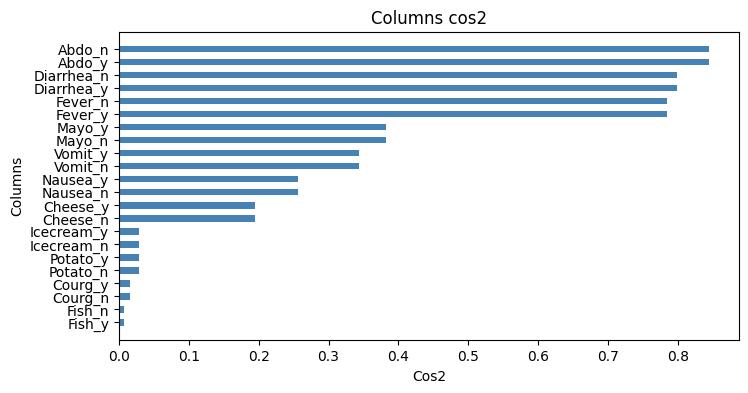

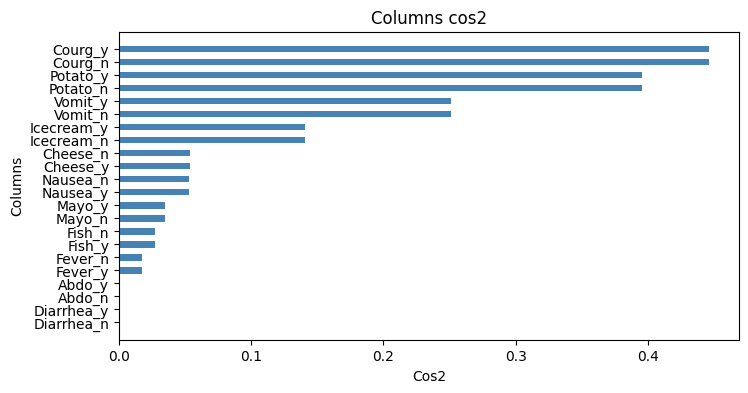

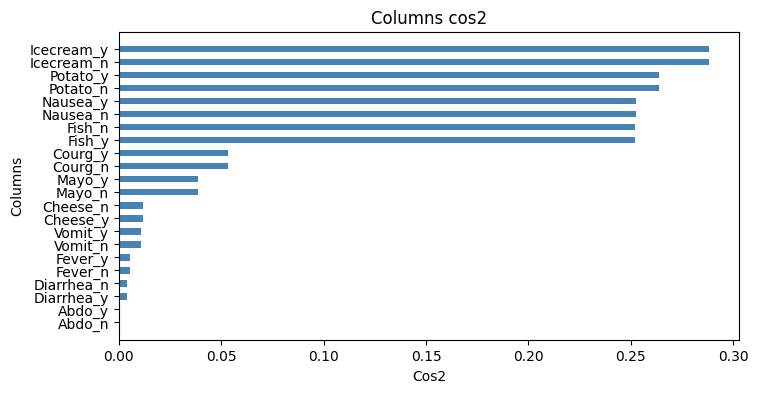

In [15]:
acm.plot_col_cos2(num_axis=1, figsize=(8,4))
acm.plot_col_cos2(num_axis=2, figsize=(8,4))
acm.plot_col_cos2(num_axis=3, figsize=(8,4))

`Contribuciones a las dimensiones`

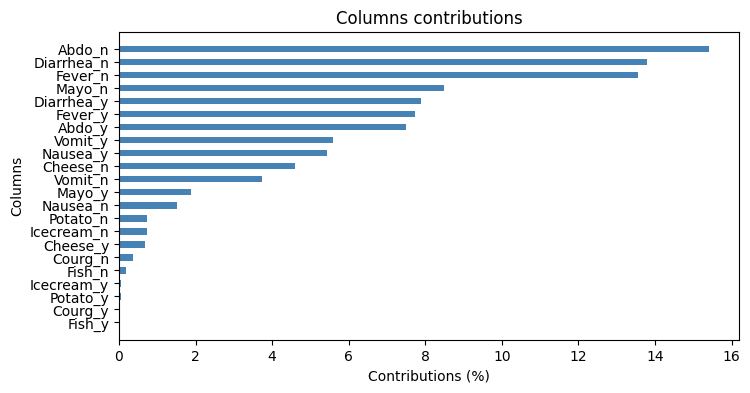

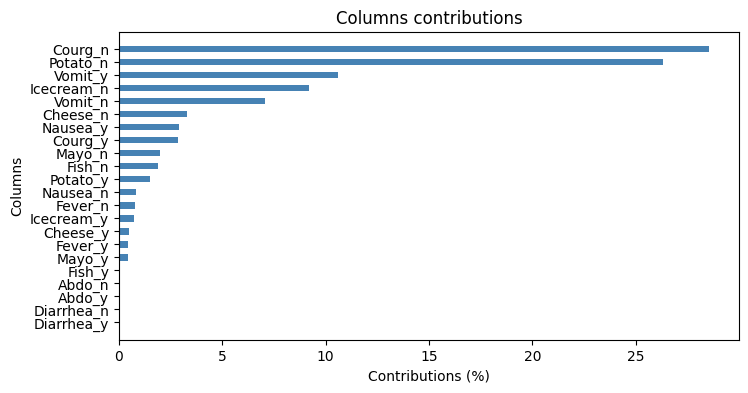

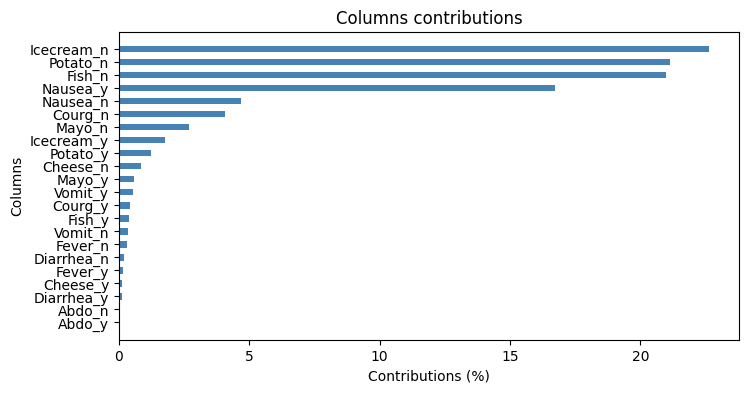

In [16]:
acm.plot_col_contrib(num_axis=1, figsize=(8,4))
acm.plot_col_contrib(num_axis=2, figsize=(8,4))
acm.plot_col_contrib(num_axis=3, figsize=(8,4))

`Visualización perfil fila y columna`

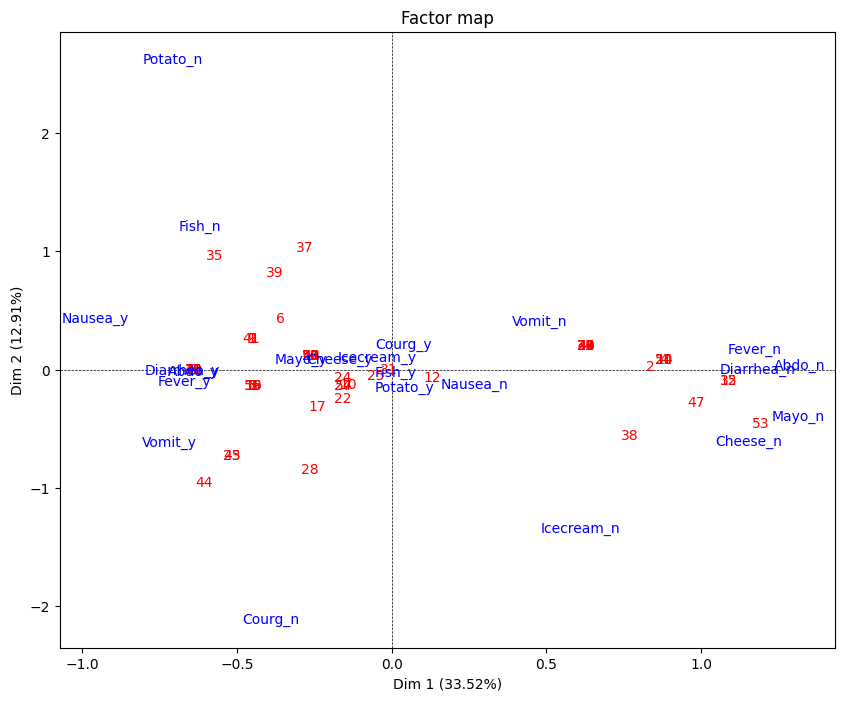

In [17]:
acm.mapping(num_x_axis=1, num_y_axis=2, figsize=(10, 8))